In [1]:
pip install xgboost scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = 'F:/HOPE/AI Course Tamil/Machine Learning Regression/Boosting Algorithm/XG Boosting/insurance_pre.csv'
df = pd.read_csv(file_path)

In [4]:
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()

In [5]:
df['sex'] = label_encoder_sex.fit_transform(df['sex'])
df['smoker'] = label_encoder_smoker.fit_transform(df['smoker'])

In [6]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']

In [7]:
print(X.head())
print(y.head())

   age  sex     bmi  children  smoker
0   19    0  27.900         0       1
1   18    1  33.770         1       0
2   28    1  33.000         3       0
3   33    1  22.705         0       0
4   32    1  28.880         0       0
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
y_pred = xgb_reg.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [12]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 24232872.810379308
Root Mean Squared Error (RMSE): 4922.689591105589


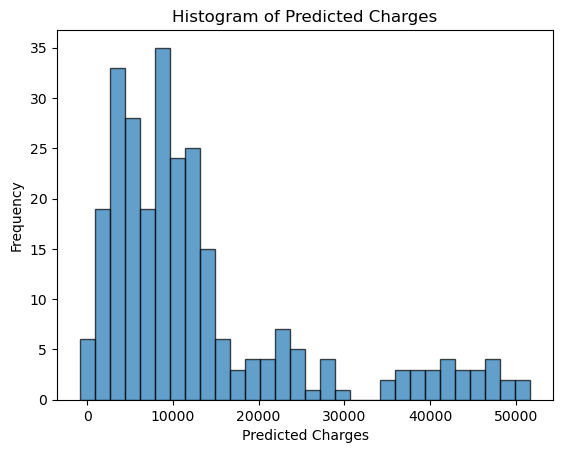

In [13]:
plt.hist(y_pred, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Charges')
plt.show()